<a href="https://colab.research.google.com/github/leidycas017/Analisis_Electro/blob/master/Metodos_optimizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Leidy Castaño Castaño - Métodos de optimización**

Bisección

Iterations a          b          t          f(a)       f(b)       f(t)       Error (%) 
0          1.000000   2.000000   1.500000   -2.000000  1.000000   -0.750000  33.333333 
1          1.500000   2.000000   1.750000   -0.750000  1.000000   0.062500   14.285714 
2          1.500000   1.750000   1.625000   -0.750000  0.062500   -0.359375  7.692308  
3          1.625000   1.750000   1.687500   -0.359375  0.062500   -0.152344  3.703704  
4          1.687500   1.750000   1.718750   -0.152344  0.062500   -0.045898  1.818182  
5          1.718750   1.750000   1.734375   -0.045898  0.062500   0.008057   0.900901  
6          1.718750   1.734375   1.726562   -0.045898  0.008057   -0.018982  0.452489  

La raíz aproximada es: 1.73046875
Está en el punto (1.730469, -0.005478)


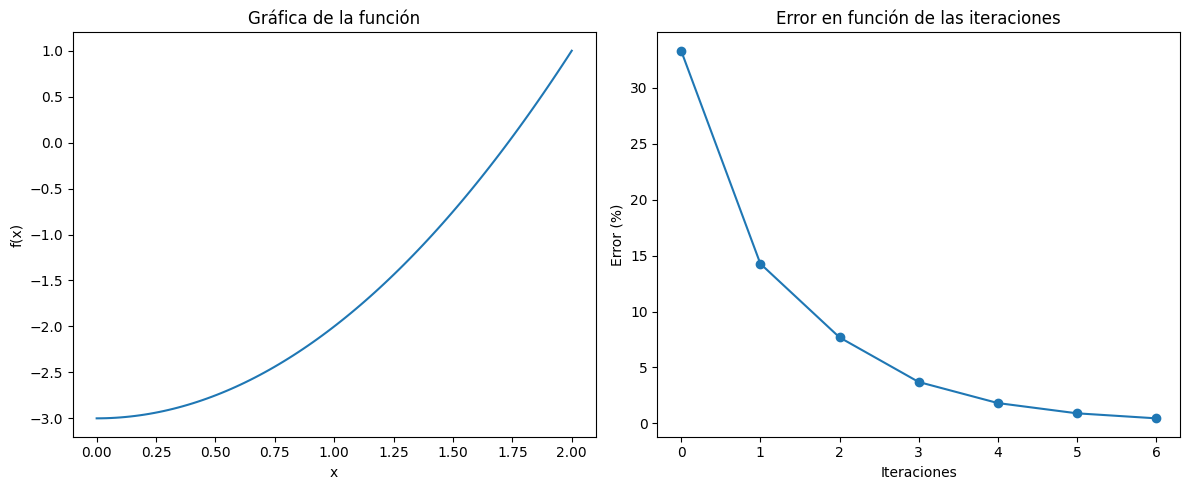

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular f(x)
def f(x):
    return x**2 - 3

# Intervalo inicial
a = 1
b = 2

# Tolerancia
tolerancia = 0.01

# Inicialización de variables
iterations = 0

# Listas para almacenar los datos de la gráfica de error
x_values = []
error_values = []

# Muestra la cabecera de la tabla
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Iterations", "a", "b", "t", "f(a)", "f(b)", "f(t)", "Error (%)"))

while abs(b - a) > tolerancia:
    # Calcula el punto medio
    t = (a + b) / 2

    # Calcula los valores de f(a), f(b) y f(t)
    fa = f(a)
    fb = f(b)
    ft = f(t)

    # Calcula el porcentaje de error
    error_percent = abs((b - a) / (b + a)) * 100

    # Almacena los valores para la gráfica de error
    x_values.append(iterations)
    error_values.append(error_percent)

    # Muestra los valores en la tabla
    print("{:<10} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f}".format(iterations, a, b, t, fa, fb, ft, error_percent))

    # Actualiza a o b según el signo de ft
    if ft < 0:
        a = t
    else:
        b = t

    iterations += 1

# Muestra la raíz aproximada y su ubicación
root_approximation = (a + b) / 2
print("\nLa raíz aproximada es:", root_approximation)
print("Está en el punto ({:.6f}, {:.6f})".format(root_approximation, f(root_approximation)))

# Gráfica de la función
x = np.linspace(0, 2, 100)  # Valores de x para la gráfica
y = f(x)  # Valores de f(x) para la gráfica

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función")

# Gráfica del error en función de las iteraciones
plt.subplot(1, 2, 2)
plt.plot(x_values, error_values, marker='o')
plt.xlabel("Iteraciones")
plt.ylabel("Error (%)")
plt.title("Error en función de las iteraciones")

plt.tight_layout()
plt.show()






Interpolación cuadratica

Iteraciones	 x0	 f(x0)	 x1	 f(x1)	 x2	 f(x2)	 x3	 f(x3)	 Error
0		 1.0000	 0.0000	 4.0000	 1.5829	 1.5055	 -3.1136	 1.5055	 1.7691	 0.186137
1		 4.0000	 1.5829	 1.5055	 -3.1136	 1.4903	 1.7691	 1.4903	 1.7714	 4.885036
2		 1.5055	 -3.1136	 1.4903	 1.7691	 1.3908	 1.7714	 1.3908	 1.7743	 0.005178
3		 1.4903	 1.7691	 1.3908	 1.7714	 1.4275	 1.7743	 1.4275	 1.7757	 0.004295
4		 1.3908	 1.7714	 1.4275	 1.7743	 1.4275	 1.7757	 1.4275	 1.7757	 0.001469
5		 1.4275	 1.7743	 1.4275	 1.7757	 1.4276	 1.7757	 1.4276	 1.7757	 0.000000


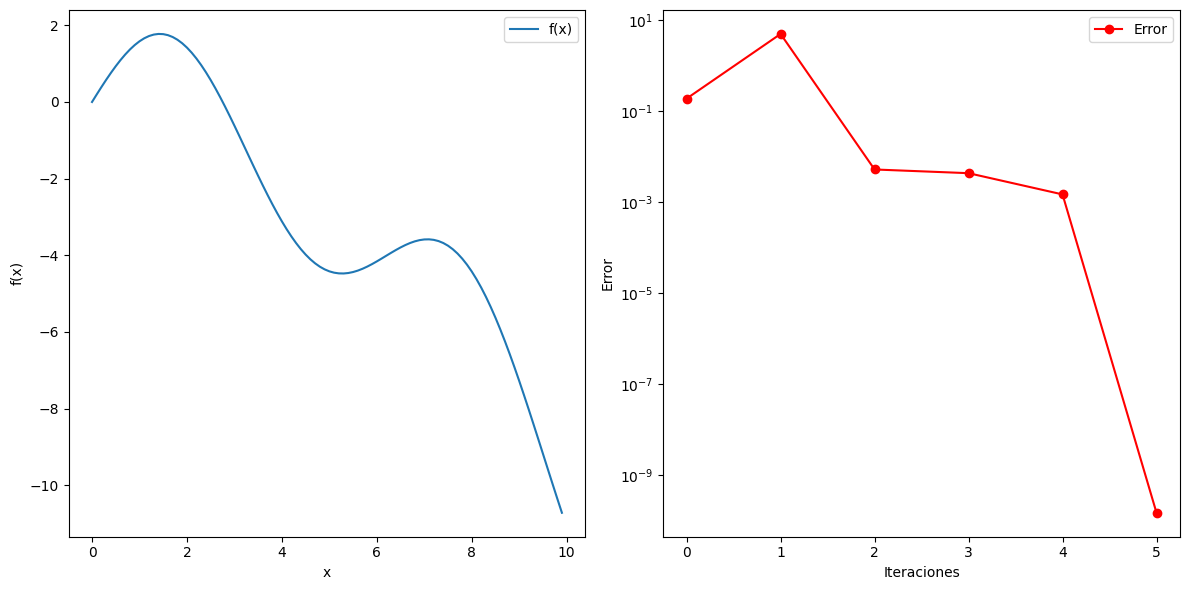

El valor máximo estimado de f(x) es 1.775726 en x = 1.427552


In [ ]:
import math
import matplotlib.pyplot as plt

# Definición de la función f(x)
def f(x):
    return 2 * math.sin(x) - x**2 / 10

# Valores iniciales
x0 = 0
x1 = 1
x2 = 4

# Parámetro de tolerancia
tolerance = 1e-6

# Inicialización de variables
iterations = 0
error = float('inf')

# Listas para almacenar los resultados
iter_list = []
x0_list = []
f_x0_list = []
x1_list = []
f_x1_list = []
x2_list = []
f_x2_list = []
x3_list = []
f_x3_list = []
error_list = []

# Bucle de iteraciones
while error > tolerance:
    # Calcular x3 usando la fórmula de interpolación cuadrática
    f_x0 = f(x0)
    f_x1 = f(x1)
    f_x2 = f(x2)
    x3 = (f_x0 * (x1**2 - x2**2) + f_x1 * (x2**2 - x0**2) + f_x2 * (x0**2 - x1**2)) / \
        (2 * f_x0 * (x1 - x2) + 2 * f_x1 * (x2 - x0) + 2 * f_x2 * (x0 - x1))
    f_x3 = f(x3)

    # Calcular el error
    error = abs(f_x3 - f_x1)

    # Actualizar valores para la siguiente iteración
    x0 = x1
    x1 = x2
    x2 = x3

    # Registrar los resultados en listas
    iter_list.append(iterations)
    x0_list.append(x0)
    f_x0_list.append(f_x0)
    x1_list.append(x1)
    f_x1_list.append(f_x1)
    x2_list.append(x2)
    f_x2_list.append(f_x2)
    x3_list.append(x3)
    f_x3_list.append(f_x3)
    error_list.append(error)

    iterations += 1

# Mostrar una tabla con los resultados
print("Iteraciones\t x0\t f(x0)\t x1\t f(x1)\t x2\t f(x2)\t x3\t f(x3)\t Error")
for i in range(iterations):
    print(f"{iter_list[i]}\t\t {x0_list[i]:.4f}\t {f_x0_list[i]:.4f}\t {x1_list[i]:.4f}\t {f_x1_list[i]:.4f}\t "
          f"{x2_list[i]:.4f}\t {f_x2_list[i]:.4f}\t {x3_list[i]:.4f}\t {f_x3_list[i]:.4f}\t {error_list[i]:.6f}")

# Graficar la función y el error
x_values = [i / 10 for i in range(100)]
y_values = [f(x) for x in x_values]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label="f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(iter_list, error_list, marker='o', linestyle='-', color='r', label="Error")
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

# Resultado final
print(f"El valor máximo estimado de f(x) es {f_x3:.6f} en x = {x3:.6f}")



Dorada max

   Iteraciones        xl        xu        x2     f(x2)        x1     f(x1)  \
0            1  0.000000  2.472136  1.527864  1.764720  2.472136  0.629974   
1            2  0.944272  2.472136  0.944272  1.530976  1.527864  1.764720   
2            3  0.944272  1.888544  1.527864  1.764720  1.888544  1.543223   
3            4  1.304952  1.888544  1.304952  1.759452  1.527864  1.764720   
4            5  1.304952  1.665631  1.527864  1.764720  1.665631  1.713580   
5            6  1.304952  1.527864  1.442719  1.775475  1.527864  1.764720   
6            7  1.390097  1.527864  1.390097  1.774200  1.442719  1.775475   
7            8  1.390097  1.475242  1.442719  1.775475  1.475242  1.773242   

          d     error  
0  2.472136  0.944272  
1  1.527864  0.583592  
2  0.944272  0.360680  
3  0.583592  0.222912  
4  0.360680  0.137767  
5  0.222912  0.085145  
6  0.137767  0.052622  
7  0.085145  0.032522  
Valor máximo encontrado en x = 1.4589803375031547
Valor máximo = 1.77464784328836

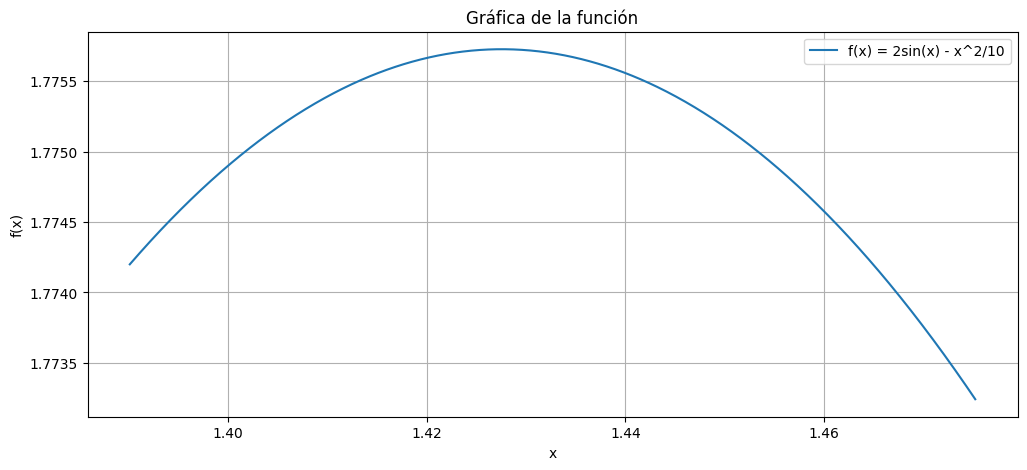

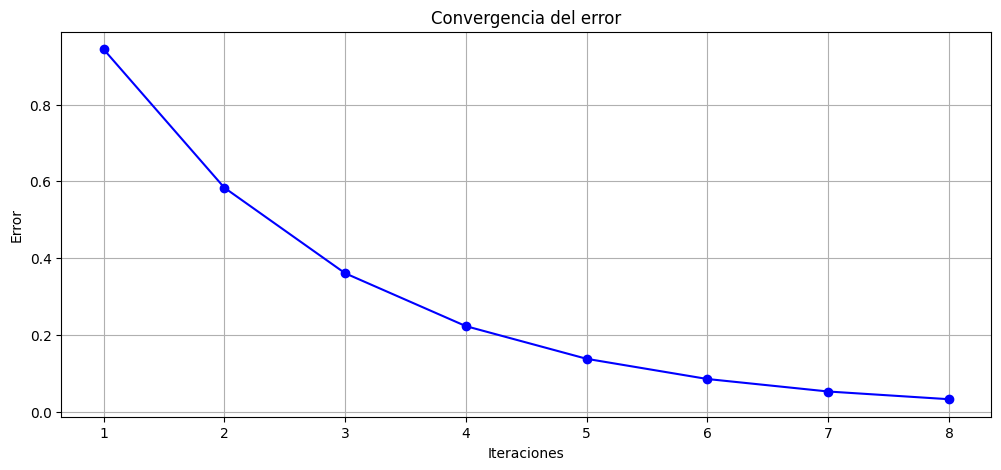

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Función a maximizar
def f(x):
    return 2 * math.sin(x) - x**2 / 10

# Parámetros iniciales
xl = 0
xu = 4
d_min = 0.01  # Tolerancia mínima
iteraciones_max = 8  # Número máximo de iteraciones

# Razón dorada
phi = (1 + math.sqrt(5)) / 2

# Inicialización de variables
d = (math.sqrt(5) - 1) / 2 * (xu - xl)
x1 = xl + d
x2 = xu - d
fx1 = f(x1)
fx2 = f(x2)
error = abs(x1 - x2)
iteraciones = 0

# Listas para almacenar datos de la tabla y el error
tabla_datos = []
errores = []

# Bucle principal
while iteraciones < iteraciones_max:
    d = (math.sqrt(5) - 1) / 2 * (xu - xl)
    x1 = xl + d
    x2 = xu - d
    fx1 = f(x1)
    fx2 = f(x2)

    if fx1 > fx2:
        xl = x2
    else:
        xu = x1

    error = abs(x1 - x2)
    iteraciones += 1

    # Agregar datos a la tabla
    tabla_datos.append([iteraciones, xl, xu, x2, fx2, x1, fx1, d, error])
    errores.append(error)

# Obtener el valor máximo encontrado
maximo = (x1 + x2) / 2
valor_maximo = f(maximo)

# Crear y mostrar la tabla de resultados
columnas = ["Iteraciones", "xl", "xu", "x2", "f(x2)", "x1", "f(x1)", "d", "error"]
tabla_resultados = pd.DataFrame(tabla_datos, columns=columnas)
print(tabla_resultados)

# Crear y mostrar la gráfica de la función
x_values = [xl + i * (xu - xl) / 1000 for i in range(1001)]
y_values = [f(x) for x in x_values]
plt.figure(figsize=(12, 5))
plt.plot(x_values, y_values, label="f(x) = 2sin(x) - x^2/10")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función")
plt.legend()
plt.grid(True)

# Crear y mostrar la gráfica del error
plt.figure(figsize=(12, 5))
plt.plot(range(1, iteraciones + 1), errores, marker='o', linestyle='-', color='b')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Convergencia del error")
plt.grid(True)

# Mostrar el valor máximo encontrado
print("Valor máximo encontrado en x =", maximo)
print("Valor máximo =", valor_maximo)

plt.show()






Dorada min

    Iteraciones        xl   xu        x2     f(x2)        x1     f(x1)  \
0             1  1.527864  4.0  1.527864  1.764720  2.472136  0.629974   
1             2  2.472136  4.0  2.472136  0.629974  3.055728 -0.762229   
2             3  3.055728  4.0  3.055728 -0.762229  3.416408 -1.709922   
3             4  3.416408  4.0  3.416408 -1.709922  3.639320 -2.279325   
4             5  3.639320  4.0  3.639320 -2.279325  3.777088 -2.613791   
..          ...       ...  ...       ...       ...       ...       ...   
95           96  4.000000  4.0  4.000000 -3.113605  4.000000 -3.113605   
96           97  4.000000  4.0  4.000000 -3.113605  4.000000 -3.113605   
97           98  4.000000  4.0  4.000000 -3.113605  4.000000 -3.113605   
98           99  4.000000  4.0  4.000000 -3.113605  4.000000 -3.113605   
99          100  4.000000  4.0  4.000000 -3.113605  4.000000 -3.113605   

               d         error  
0   2.472136e+00  9.442719e-01  
1   1.527864e+00  5.835921e-01  
2   9.442719

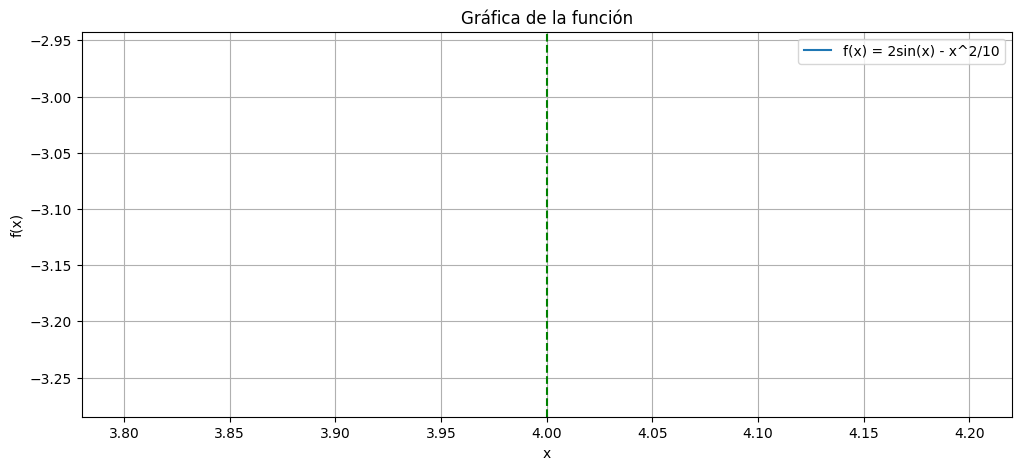

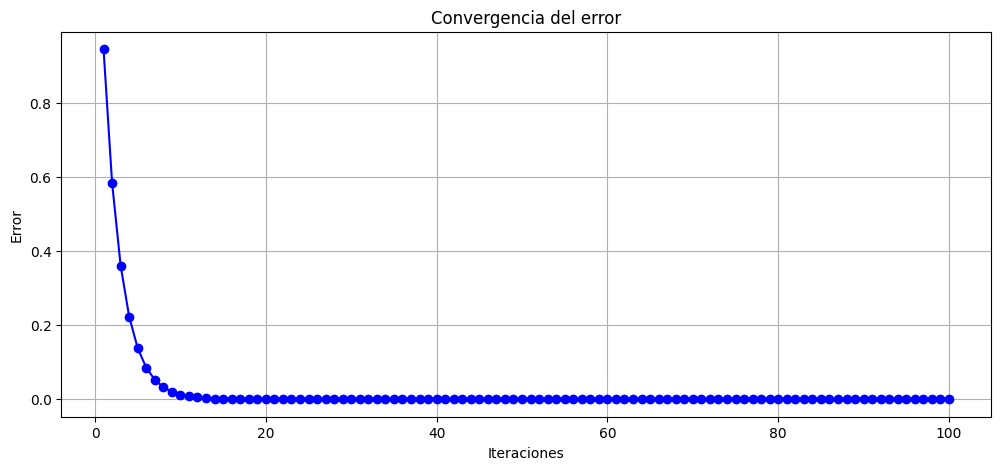

Valor mínimo encontrado en x = 3.9999999999999982
Valor mínimo = -3.113604990615853


In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Función a minimizar
def f(x):
    return 2 * math.sin(x) - x**2 / 10

# Parámetros iniciales
xl = 0
xu = 4
d_min = 0.01  # Tolerancia mínima
iteraciones_max = 100  # Número máximo de iteraciones

# Razón dorada
phi = (1 + math.sqrt(5)) / 2

# Inicialización de variables
d = (math.sqrt(5) - 1) / 2 * (xu - xl)
x1 = xl + d
x2 = xu - d
fx1 = f(x1)
fx2 = f(x2)
error = abs(x1 - x2)
iteraciones = 0

# Listas para almacenar datos de la tabla y el error
tabla_datos = []
errores = []

# Bucle principal
while iteraciones < iteraciones_max:
    d = (math.sqrt(5) - 1) / 2 * (xu - xl)
    x1 = xl + d
    x2 = xu - d
    fx1 = f(x1)
    fx2 = f(x2)

    if fx1 < fx2:
        xl = x2
    else:
        xu = x1

    error = abs(x1 - x2)
    iteraciones += 1

    # Agregar datos a la tabla
    tabla_datos.append([iteraciones, xl, xu, x2, fx2, x1, fx1, d, error])
    errores.append(error)

# Obtener el valor mínimo encontrado
minimo = (x1 + x2) / 2
valor_minimo = f(minimo)

# Crear y mostrar la tabla de resultados
columnas = ["Iteraciones", "xl", "xu", "x2", "f(x2)", "x1", "f(x1)", "d", "error"]
tabla_resultados = pd.DataFrame(tabla_datos, columns=columnas)
print(tabla_resultados)

# Crear y mostrar la gráfica de la función
x_values = [xl + i * (xu - xl) / 1000 for i in range(1001)]
y_values = [f(x) for x in x_values]
plt.figure(figsize=(12, 5))
plt.plot(x_values, y_values, label="f(x) = 2sin(x) - x^2/10")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfica de la función")
plt.legend()
plt.grid(True)

# Marcar el valor mínimo en la gráfica
plt.axvline(x=minimo, color="g", linestyle="--", label=f'Minimo en x={minimo:.4f}')

# Crear y mostrar la gráfica del error
plt.figure(figsize=(12, 5))
plt.plot(range(1, iteraciones + 1), errores, marker='o', linestyle='-', color='b')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.title("Convergencia del error")
plt.grid(True)

plt.show()

# Mostrar el valor mínimo encontrado
print("Valor mínimo encontrado en x =", minimo)
print("Valor mínimo =", valor_minimo)




Falsa posición

Raiz encontrada: 1.36354744
   Iteraciones        xl  xu  Valor de xr  Valor de f(xr)     Error
0            1  1.000000   2     1.263158       -1.602274       inf
1            2  1.263158   2     1.338828       -0.430365  0.056520
2            3  1.338828   2     1.358546       -0.110009  0.014514
3            4  1.358546   2     1.363547       -0.027762  0.003668


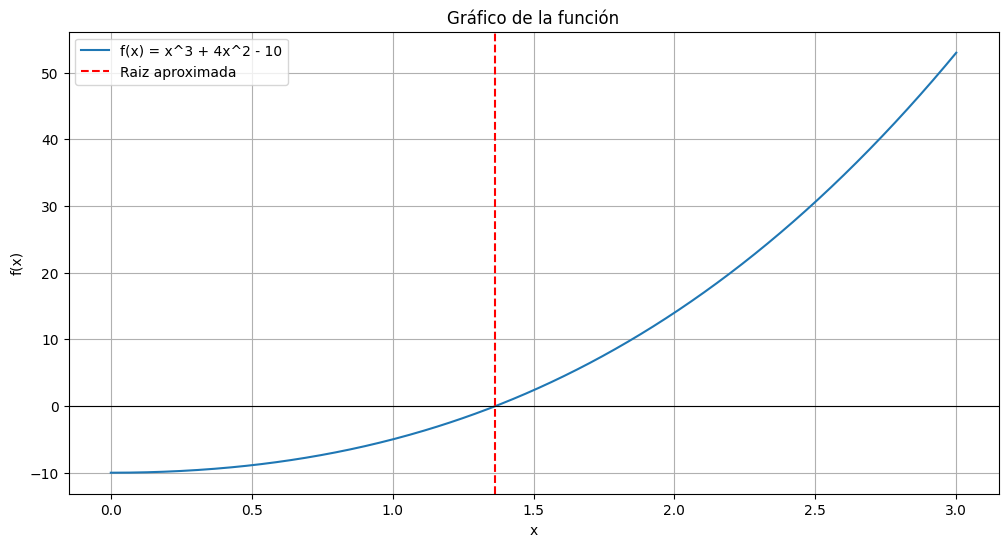

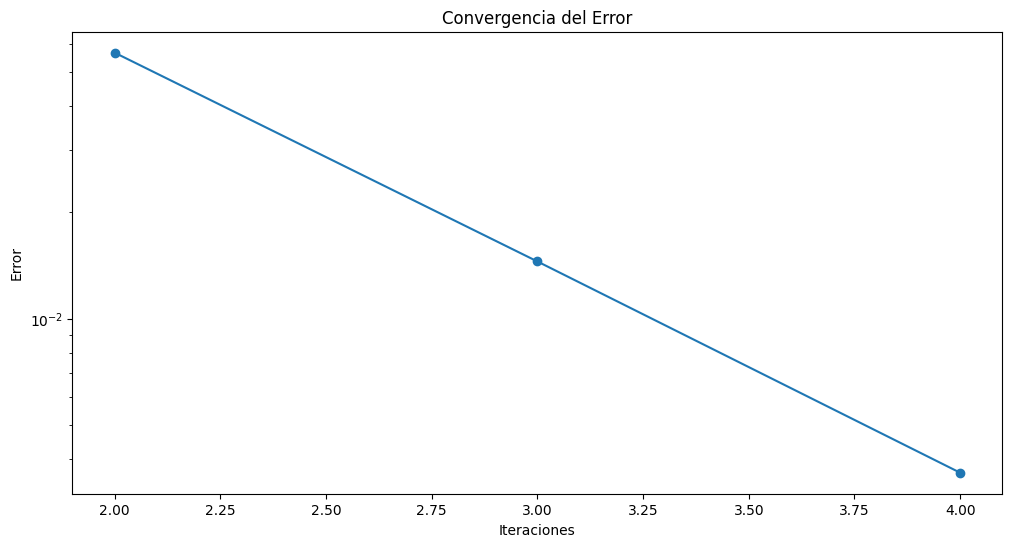

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def f(x):
    return x**3 + 4*x**2 - 10

def false_position(func, xl, xu, error_tol, max_iterations):
    xr_prev = None
    iteraciones = []
    valores_xl = []
    valores_xu = []
    valores_xr = []
    valores_fx = []
    errores = []

    for i in range(max_iterations):
        xr = xu - ((func(xu) * (xl - xu)) / (func(xl) - func(xu)))
        error = abs((xr - xr_prev) / xr) if xr_prev is not None else float('inf')

        iteraciones.append(i + 1)
        valores_xl.append(xl)
        valores_xu.append(xu)
        valores_xr.append(xr)
        valores_fx.append(func(xr))
        errores.append(error)

        if error < error_tol:
            return xr, iteraciones, valores_xl, valores_xu, valores_xr, valores_fx, errores

        xr_prev = xr

        if func(xr) * func(xl) > 0:
            xl = xr
        else:
            xu = xr

    return None, iteraciones, valores_xl, valores_xu, valores_xr, valores_fx, errores

xl = 1
xu = 2
error_tol = 0.01
max_iterations = 100

root, iteraciones, valores_xl, valores_xu, valores_xr, valores_fx, errores = false_position(f, xl, xu, error_tol, max_iterations)

if root is not None:
    print(f"Raiz encontrada: {root:.8f}")
else:
    print("No converge en las iteraciones dadas.")

# Crear una tabla con pandas
data = {
    "Iteraciones": iteraciones,
    "xl": valores_xl,
    "xu": valores_xu,
    "Valor de xr": valores_xr,
    "Valor de f(xr)": valores_fx,
    "Error": errores
}

df = pd.DataFrame(data)

# Imprimir la tabla
print(df)

# Crear gráfica de la función
x_vals = np.linspace(0, 3, 400)
y_vals = f(x_vals)
plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^3 + 4x^2 - 10')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=root, color='red', linestyle='--', label='Raiz aproximada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico de la función')
plt.legend()
plt.grid()

plt.show()

# Plotting the error convergence
plt.figure(figsize=(12, 6))
plt.plot(iteraciones, errores, marker='o', linestyle='-')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Convergencia del Error')

plt.show()



Newton máximo

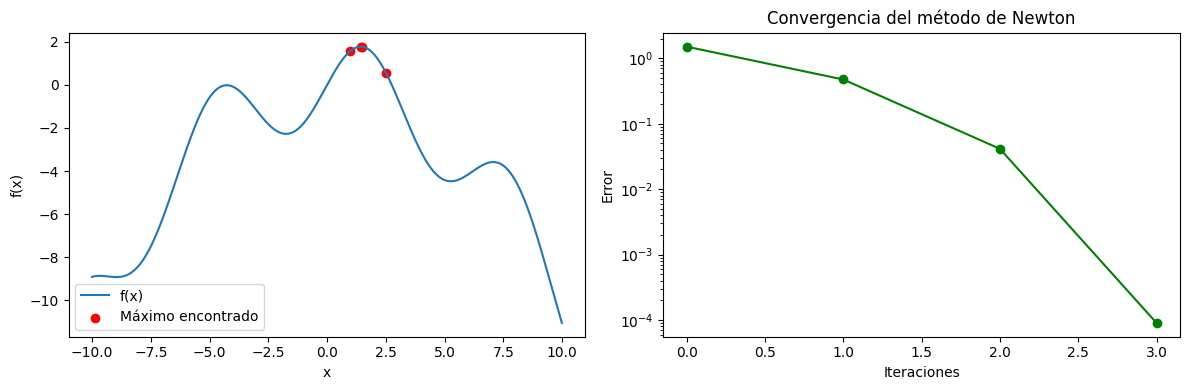

Tabla de resultados:
Iteraciones  x            f(x)         f'(x)        f''(x)       Error       
0            2.500000     0.571944     -2.102287    -1.396944    1.504918    
1            0.995082     1.578588     0.889853     -1.877607    0.473929    
2            1.469011     1.773849     -0.090582    -2.189649    0.041368    
3            1.427642     1.775726     -0.000197    -2.179542    0.000091    

Valor maximo de la función encontrado: 1.4276423210187772


In [ ]:
import math
import matplotlib.pyplot as plt

# Definir la función objetivo y sus derivadas
def f(x):
    return 2 * math.sin(x) - x**2 / 10

def df(x):
    return 2 * math.cos(x) - x / 5

def d2f(x):
    return -2 * math.sin(x) - 1 / 5

# Parámetros iniciales
x0 = 2.5
max_iter = 100
tolerancia = 0.01

# Listas para almacenar los resultados
iteraciones = []
valores_x = []
valores_fx = []
valores_df = []
valores_d2f = []
errores = []

# Algoritmo de Newton para encontrar el máximo
x = x0
for i in range(max_iter):
    fx = f(x)
    dfx = df(x)
    d2fx = d2f(x)
    error = abs(dfx / d2fx)

    iteraciones.append(i)
    valores_x.append(x)
    valores_fx.append(fx)
    valores_df.append(dfx)
    valores_d2f.append(d2fx)
    errores.append(error)

    if error < tolerancia:
        break

    x = x - dfx / d2fx

# Mostrar el valor encontrado
valor_encontrado = valores_x[-1]

# Graficar la función
x_vals = [x / 100 for x in range(-1000, 1000)]  # Valores de x para la gráfica
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(valores_x, valores_fx, color='red', label='Máximo encontrado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Graficar el error
plt.subplot(1, 2, 2)
plt.plot(iteraciones, errores, marker='o', linestyle='-', color='green')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Convergencia del método de Newton')

plt.tight_layout()
plt.show()

# Mostrar una tabla con los resultados
print("Tabla de resultados:")
print("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(
    "Iteraciones", "x", "f(x)", "f'(x)", "f''(x)", "Error"))
for i in range(len(iteraciones)):
    print("{:<12} {:<12.6f} {:<12.6f} {:<12.6f} {:<12.6f} {:<12.6f}".format(
        iteraciones[i], valores_x[i], valores_fx[i], valores_df[i], valores_d2f[i], errores[i]))

print("\nValor maximo de la función encontrado:", valor_encontrado)


Newton Raphson

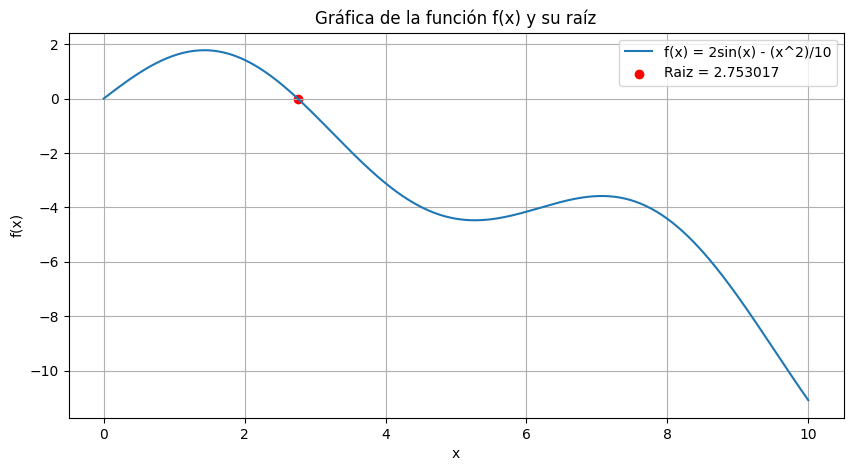

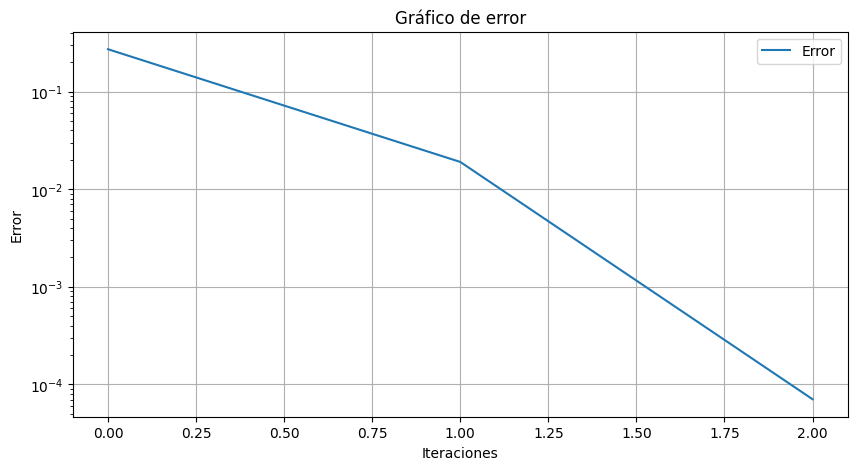

Valor encontrado para la raíz: 2.753017

Iteraciones  x            f(x)         f'(x)        Error       
1            2.500000     0.571944     -2.102287    0.272058    
2            2.772058     -0.046068    -2.419403    0.019041    
3            2.753017     -0.000169    -2.401503    0.000071    


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def derive(x):
    return 2 * math.cos(x) - x / 5

def calculate_x_plus(x, f, fd1):
    return x - f / fd1

def calculate_f(x):
    return 2 * math.sin(x) - x ** 2 / 10

x0 = 2.5  # Cambio en el valor inicial
err = 0.01
max_iterations = 100

x_values = []
f_values = []
fd1_values = []
error_values = []

x = x0
for i in range(max_iterations):
    f = calculate_f(x)
    fd1 = derive(x)
    x_plus = calculate_x_plus(x, f, fd1)

    error = abs(x_plus - x)

    x_values.append(x)
    f_values.append(f)
    fd1_values.append(fd1)
    error_values.append(error)

    if error < err:
        break

    x = x_plus

root = x
root_value = calculate_f(root)

# Plot the function
x_range = np.linspace(0, 10, 400)
y_range = [calculate_f(x) for x in x_range]
plt.figure(figsize=(10, 5))
plt.plot(x_range, y_range, label='f(x) = 2sin(x) - (x^2)/10')
plt.scatter(root, root_value, color='red', marker='o', label=f'Raiz = {root:.6f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Gráfica de la función f(x) y su raíz')
plt.grid(True)
plt.show()

# Plot the error
plt.figure(figsize=(10, 5))
plt.plot(range(len(error_values)), error_values, label='Error')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.title('Gráfico de error')
plt.grid(True)
plt.show()

# Tabla con los resultados
print('Valor encontrado para la raíz: {:.6f}\n'.format(root))
print('{:<12} {:<12} {:<12} {:<12} {:<12}'.format("Iteraciones", "x", "f(x)", "f'(x)", "Error"))
for i, (xi, fi, fd1i, errori) in enumerate(zip(x_values, f_values, fd1_values, error_values)):
    print('{:<12} {:<12.6f} {:<12.6f} {:<12.6f} {:<12.6f}'.format(i + 1, xi, fi, fd1i, errori))



Busqueda aleatoria

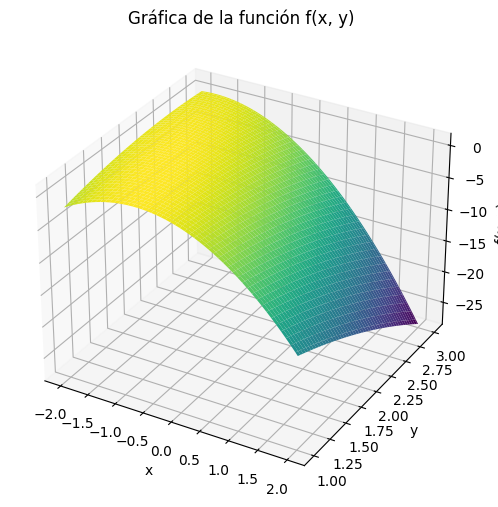

Valor mínimo encontrado: -27.873372905790134
Valor máximo encontrado: 1.249738557189617

Tabla de iteraciones, x, y, f(x, y):

      Iteraciones         x         y    f(x, y)
0               1  1.791457  1.419112 -13.889420
1               2 -0.989259  1.365533   1.234576
2               3  1.670698  2.762490 -21.352602
3               4  1.192296  2.607382 -14.444038
4               5 -1.876002  2.452832   0.476718
...           ...       ...       ...        ...
4995         4996 -0.041730  2.624555  -4.006439
4996         4997  1.972940  1.617923 -17.141801
4997         4998 -1.762235  1.126078  -0.621856
4998         4999 -1.240744  1.955949   1.145729
4999         5000  0.280220  2.987625  -8.049925

[5000 rows x 4 columns]


In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Definir la función f(x, y)
def funcion(x, y):
    return y - x - 2 * x ** 2 - 2 * x * y - y ** 2

# Parámetros
xl, xu = -2, 2
yl, yu = 1, 3
n = 5000

# Inicializar listas para registrar resultados
listaX = []
listaY = []
listaZ = []

# Inicializar valores máximo y mínimo
maximo = -float('inf')
minimo = float('inf')

# Búsqueda aleatoria para encontrar máximo y mínimo
for i in range(n):
    # Generar valores aleatorios x e y dentro de los límites
    x = xl + (xu - xl) * random.random()
    y = yl + (yu - yl) * random.random()

    # Calcular el valor de la función
    z = funcion(x, y)

    # Actualizar máximo y mínimo
    if z > maximo:
        maximo = z
        maxX = x
        maxY = y
    if z < minimo:
        minimo = z
        minX = x
        minY = y

    # Registrar resultados en listas
    listaX.append(x)
    listaY.append(y)
    listaZ.append(z)

# Crear una cuadrícula 2D para la gráfica de superficie
x_values = np.linspace(xl, xu, 100)
y_values = np.linspace(yl, yu, 100)
X, Y = np.meshgrid(x_values, y_values)
Z = funcion(X, Y)

# Graficar la función en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gráfica de la función f(x, y)')
plt.show()

# Crear una tabla con las iteraciones, x, y, f(x, y)
data = {'Iteraciones': list(range(1, n + 1)), 'x': listaX, 'y': listaY, 'f(x, y)': listaZ}
df = pd.DataFrame(data)

# Mostrar el valor mínimo y máximo
print("Valor mínimo encontrado:", minimo)
print("Valor máximo encontrado:", maximo)

# Mostrar la tabla
print("\nTabla de iteraciones, x, y, f(x, y):\n")
print(df)

